In [470]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import openpyxl
import matplotlib.ticker as ticker

plt.style.use(['ieee','scatter','grid'])

In [471]:
#import Test1.xlsx and make dataframe
df = pd.read_excel('Test1.xlsx', sheet_name='Sheet1')
df.dropna(how='all', inplace=True)

units = df.iloc[0]
new_columns = []
for col, unit in zip(df.columns, units):
    if pd.notna(unit):
        new_columns.append(f"{col} {unit}")
    else:
        new_columns.append(col)

df.columns = new_columns

# Remove the row with units
df.drop(df.index[0], inplace=True)

df.dropna(axis=1, how='all', inplace=True)


# Reset the index
df.reset_index(drop=True, inplace=True)


#display dataframe
df
#make new dataframe with only the columns we want

,Point No.,Angular Frequency [rad/s],Storage Modulus [Pa],Loss Modulus [Pa],Loss Factor [1],Shear Strain [%],Shear Stress [Pa],Torque [mN·m]
0,1.0,100,311430,277390,0.891,1,4172.5,19.229
1,2.0,63.1,226860,243420,1.073,1,3330,15.346
2,3.0,39.8,156830,204290,1.303,1,2577.7,11.879
3,4.0,25.1,102120,163500,1.601,1,1930,8.8941
4,5.0,15.8,62628,124840,1.993,1,1398.7,6.4457
5,6.0,10,36212,91248,2.52,1,983.84,4.534
6,7.0,6.31,19796,64041,3.235,1,672.71,3.1002
7,8.0,3.98,10341,43572,4.214,1,449.33,2.0707
8,9.0,2.51,5184.3,28814,5.558,1,294,1.3549
9,10.0,1.58,2530.8,18625,7.359,1.01,189.02,0.87108


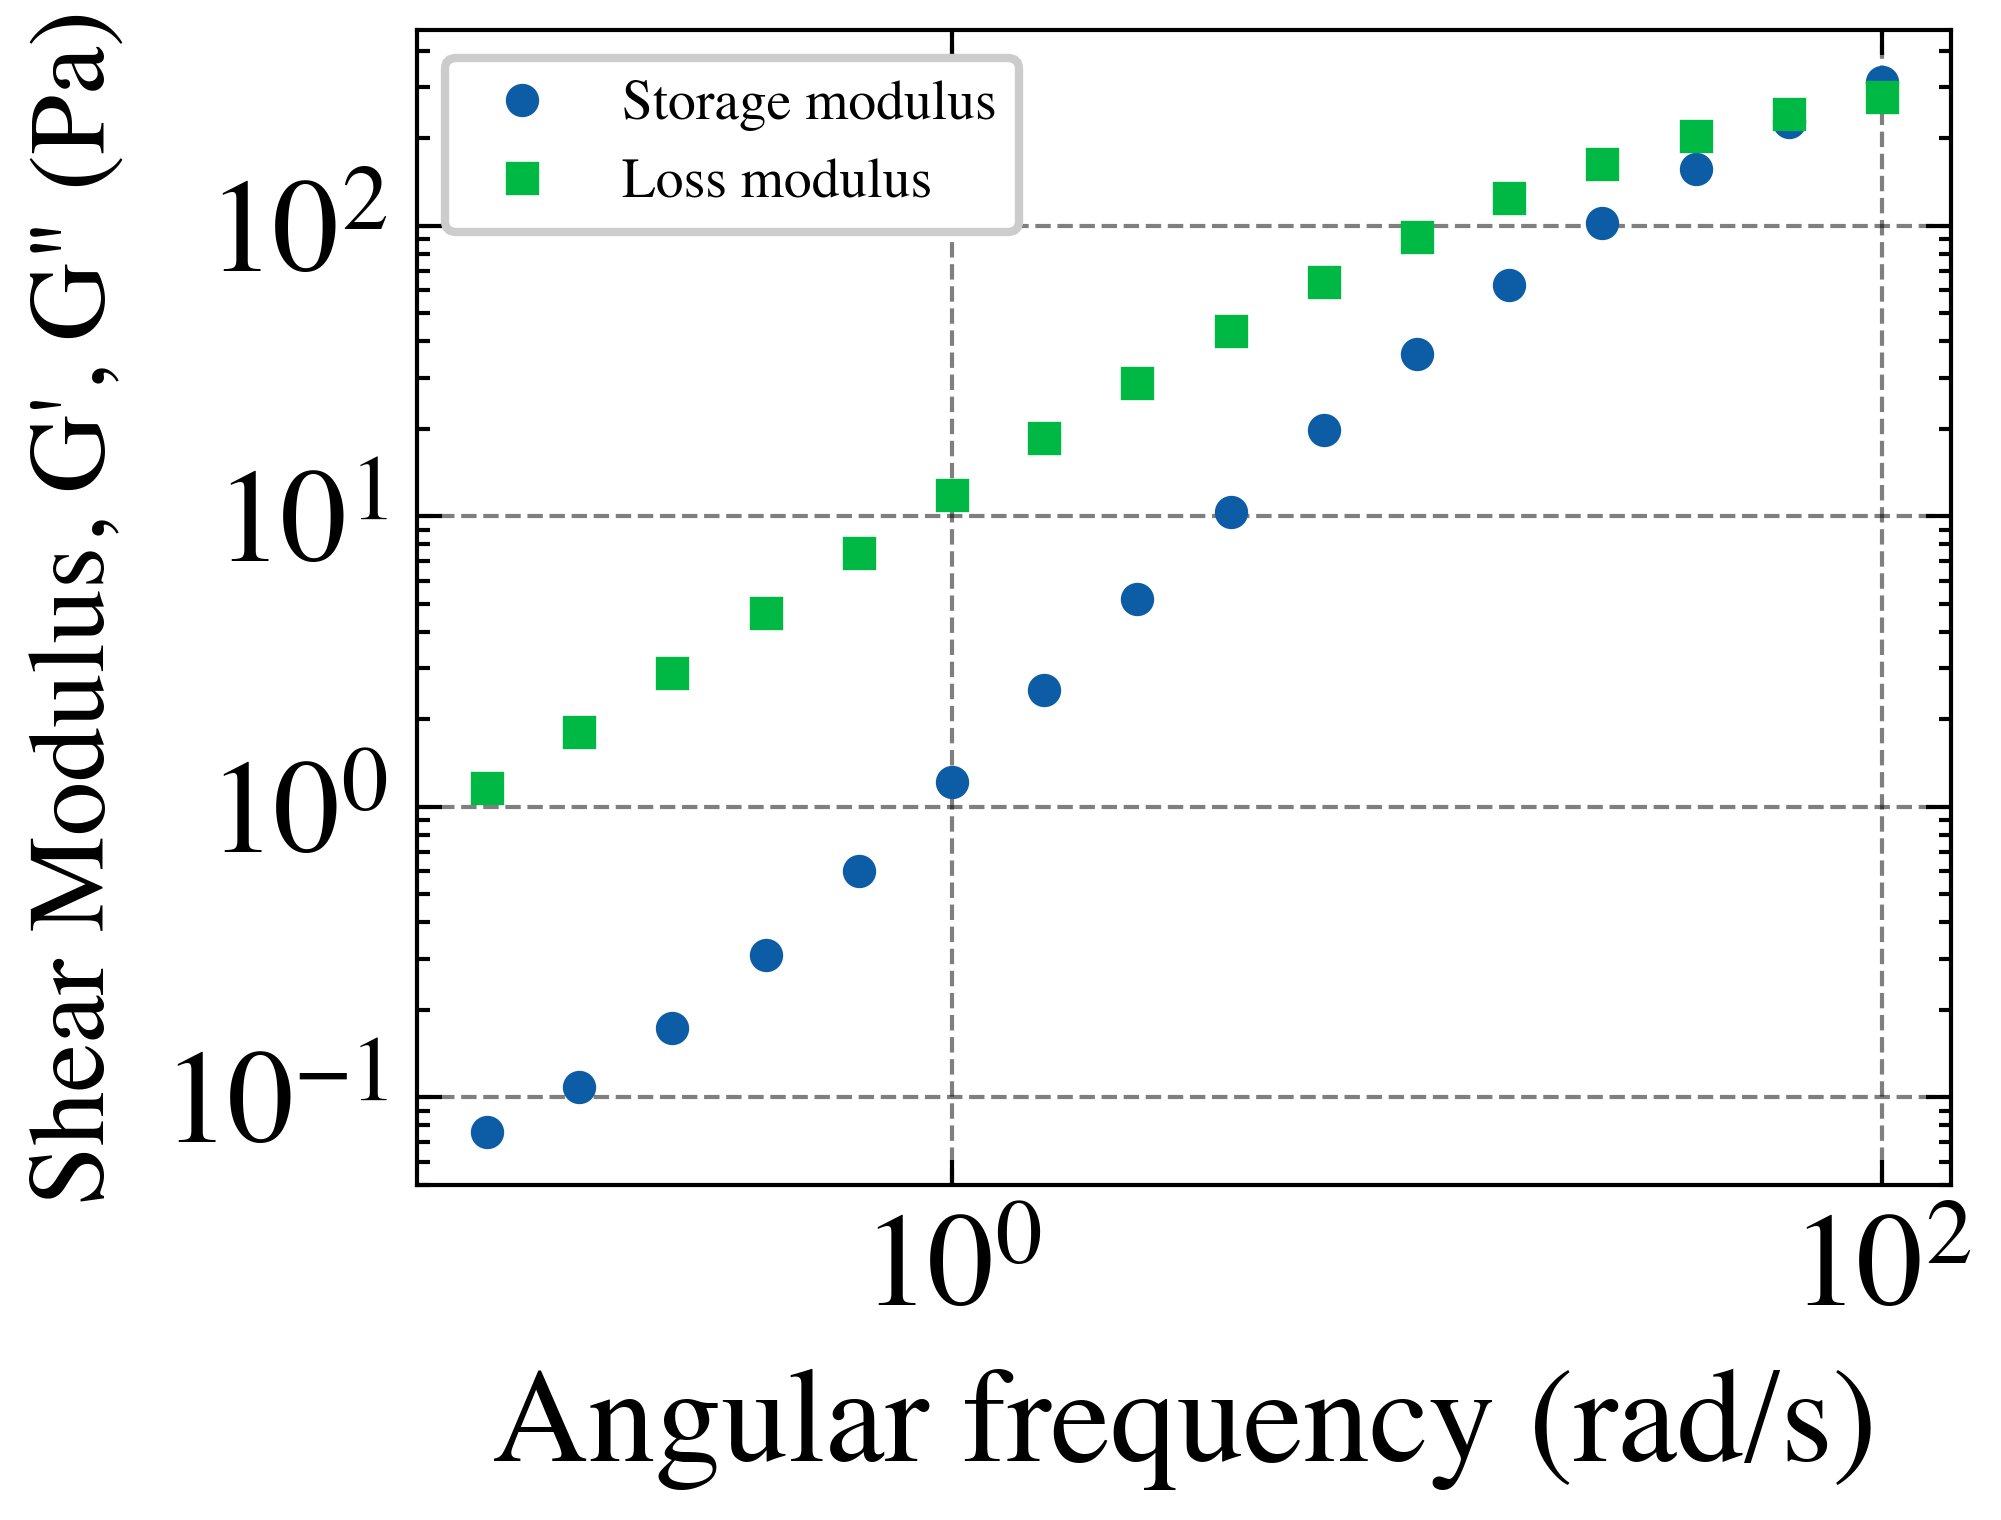

In [472]:
#plot angular frequency(rad/s) on the x axis (log scale) and storage and loss moduli on the y axis
fig, ax = plt.subplots()
#convert to kpa
df['Storage Modulus [Pa]'] = df['Storage Modulus [Pa]']/1000
df['Loss Modulus [Pa]'] = df['Loss Modulus [Pa]']/1000

ax.plot(df['Angular Frequency [rad/s]'], df['Storage Modulus [Pa]'], label='Storage modulus')
ax.plot(df['Angular Frequency [rad/s]'], df['Loss Modulus [Pa]'], label='Loss modulus')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Angular frequency (rad/s)')
ax.set_ylabel('Shear Modulus, G\', G" (Pa)',fontsize=13)
plt.legend(fontsize='small')  # Choose an appropriate size like 'small', 'medium', 'large', or a numeric value
plt.savefig('modfreq.png', dpi=300, bbox_inches='tight')
plt.show()



In [473]:
#now sheet 2
df2 = pd.read_excel('Test1.xlsx', sheet_name='Sheet2')
df2.dropna(how='all', inplace=True)

units = df2.iloc[0]
new_columns = []
for col, unit in zip(df2.columns, units):
    if pd.notna(unit):
        new_columns.append(f"{col} {unit}")
    else:
        new_columns.append(col)

df2.columns = new_columns

# Remove the row with units
df2.drop(df2.index[0], inplace=True)

df2.dropna(axis=1, how='all', inplace=True)


# Reset the index
df2.reset_index(drop=True, inplace=True)


#display dataframe
df2

,Point No.,Time [min],Temperature [°C],Shear Stress [Pa],Viscosity [mPa·s],Torque [mN·m],Status
0,1.0,0.5,49.95,27124,24925000,125,"WMa,Dy_auto"
1,2.0,1,52.74,27124,26255000,125,"WMa,Dy_auto"
2,3.0,1.5,55.71,27124,23483000,125,"WMa,Dy_auto"
3,4.0,2,58.55,27124,18107000,125,"WMa,Dy_auto"
4,5.0,2.5,61.33,27124,11624000,125,"WMa,Dy_auto"
5,6.0,3,64.09,27124,8418700,125,"WMa,Dy_auto"
6,7.0,3.5,66.83,27124,6381500,125,"WMa,Dy_auto"
7,8.0,4,69.56,27124,5009600,125,"WMa,Dy_auto"
8,9.0,4.5,72.29,27124,2901200,125,"WMa,Dy_auto"
9,10.0,5,75.03,27124,1224900,125,"WMa,Dy_auto"


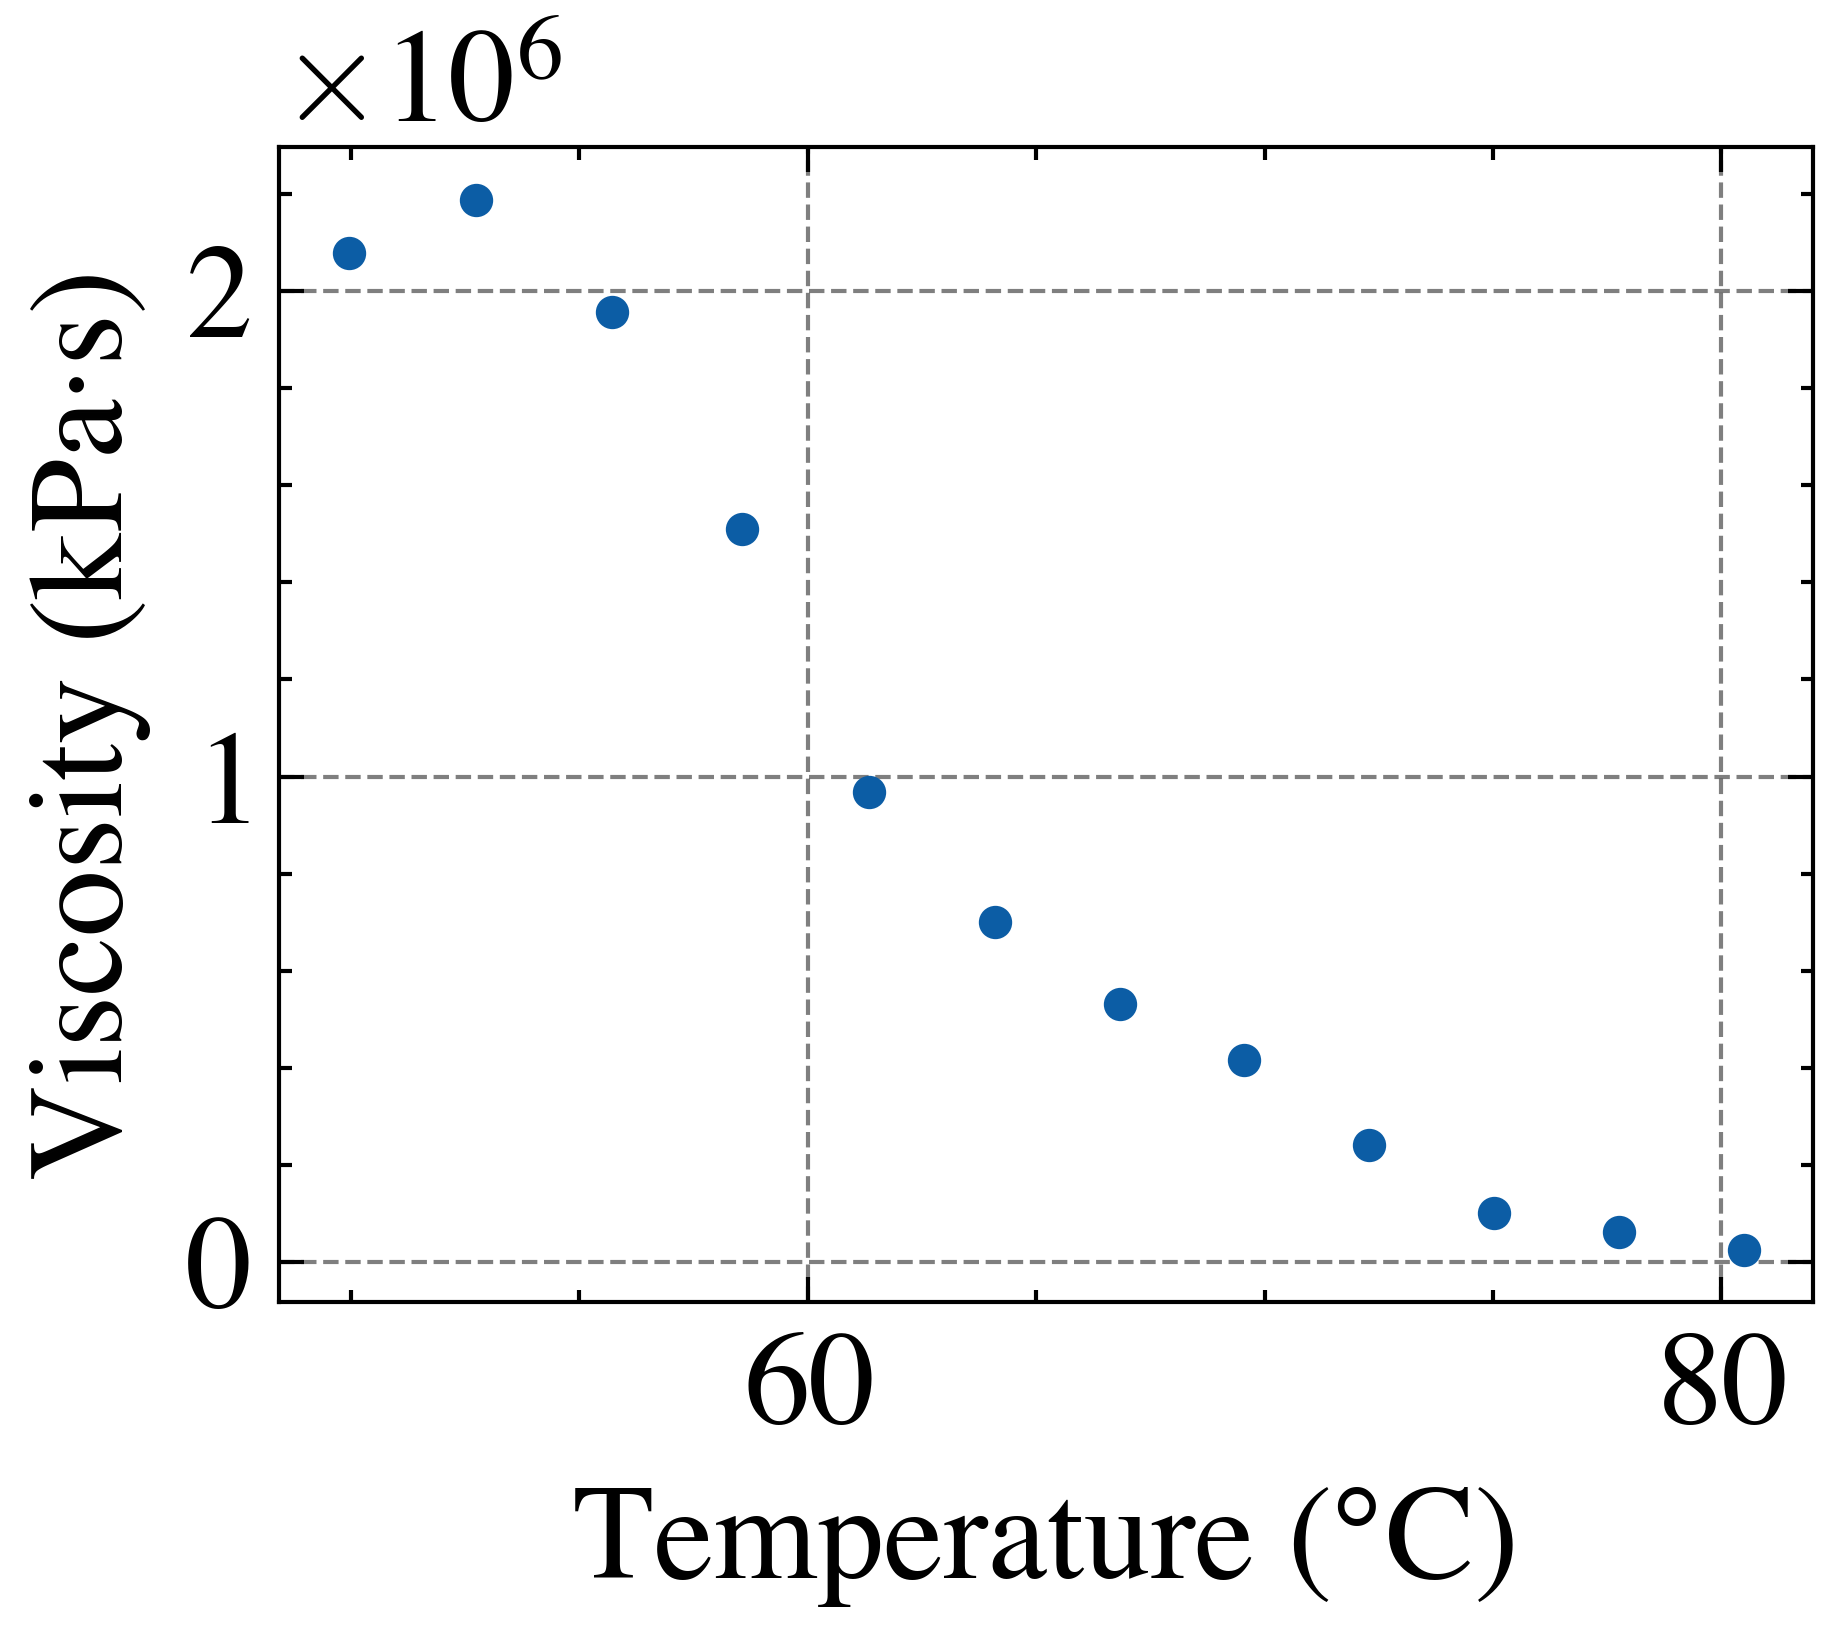

In [474]:
#plot temperature [°C] on x axis and viscosity [mPa·s] on y axis
fig, ax = plt.subplots()
df2['Viscosity [kPa·s]'] = df2['Viscosity [mPa·s]'] / (10^6)
ax.plot(df2['Temperature [°C]'], df2['Viscosity [kPa·s]'], label='Viscosity')
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Viscosity (kPa·s)')
plt.savefig('tempvis.png', dpi=300, bbox_inches='tight')
plt.show()


In [475]:
import pandas as pd

def process_sheet(df):
    df.dropna(how='all', inplace=True)
    units = df.iloc[0]
    new_columns = [f"{col} {unit}" if pd.notna(unit) else col for col, unit in zip(df.columns, units)]
    df.columns = new_columns
    #drop column 'Status'
    df = df.drop(columns=['Status'])
    df.drop(df.index[0], inplace=True)
    df.dropna(axis=1, how='all', inplace=True)
    df.reset_index(drop=True, inplace=True)
    
    # Print column names to verify
    # print("Processed columns:", df.columns.tolist())
    
    return df


def select_columns_for_plotting(df, sheet_name):
    # Define your logic here based on sheet_name to select columns
    selected_columns = []  # Add your logic here
    return df[selected_columns]

file_name = 'Testing1-26.xlsx'

# Load the Excel file once to fetch all sheet names and normalize them
xls = pd.ExcelFile(file_name)
available_sheets = {sheet.lower(): sheet for sheet in xls.sheet_names}  # Dictionary mapping lowercase to original names

conditions = ['0%', '5%', '10%', '15%', '20%', '25%']  # Adjust conditions as needed
test_types = ['Freq', 'Amp', 'Stress relaxation', 'Creep + relax', 'Temp']
# Generate lowercase sheet names for comparison
sheet_names = [f"{test_type.lower()} = {condition.lower()}" for condition in conditions for test_type in test_types]

dfs = {}

for sheet_name in sheet_names:
    try:
        original_sheet_name = available_sheets.get(sheet_name.lower())  # Use lowercase for comparison
        if original_sheet_name:
            df = pd.read_excel(file_name, sheet_name=original_sheet_name)
            processed_df = process_sheet(df)
            #get rid of column 'Status'
            # Use lowercase sheet name as the key for consistency
            dfs[original_sheet_name.lower()] = processed_df
        else:
            print(f"Sheet not found: {sheet_name}")
    except Exception as e:
        print(f"Error processing {sheet_name}: {e}")

# Now dfs contains a processed DataFrame for each sheet, using the original sheet names


Error processing freq = 5%: single positional indexer is out-of-bounds
Sheet not found: amp = 5%
Sheet not found: stress relaxation = 5%
Sheet not found: creep + relax = 5%
Sheet not found: temp = 5%
Error processing freq = 10%: single positional indexer is out-of-bounds
Sheet not found: amp = 10%
Sheet not found: stress relaxation = 10%
Sheet not found: creep + relax = 10%
Sheet not found: temp = 10%
Error processing freq = 15%: single positional indexer is out-of-bounds
Sheet not found: amp = 15%
Sheet not found: stress relaxation = 15%
Sheet not found: creep + relax = 15%
Sheet not found: temp = 15%
Error processing freq = 20%: single positional indexer is out-of-bounds
Sheet not found: amp = 20%
Sheet not found: stress relaxation = 20%
Sheet not found: creep + relax = 20%
Sheet not found: temp = 20%
Error processing freq = 25%: single positional indexer is out-of-bounds
Sheet not found: amp = 25%
Sheet not found: stress relaxation = 25%
Sheet not found: creep + relax = 25%
Sheet no

# Frequency test

   Point No. Angular Frequency [rad/s] Storage Modulus [Pa] Loss Modulus [Pa]  \
0        1.0                       100               142110            133530   
1        2.0                      63.1               119140            126400   
2        3.0                      39.8                94973            118120   
3        4.0                      25.1                72832            110420   
4        5.0                      15.8                53700             99576   

  Loss Factor [1] Shear Strain [%] Shear Stress [Pa] Torque [mN·m]  
0            0.94                1            1952.7        8.9989  
1           1.061                1            1738.5        8.0119  
2           1.244                1            1515.5        6.9843  
3           1.516            0.992            1312.7        6.0493  
4           1.854            0.993              1124        5.1797  


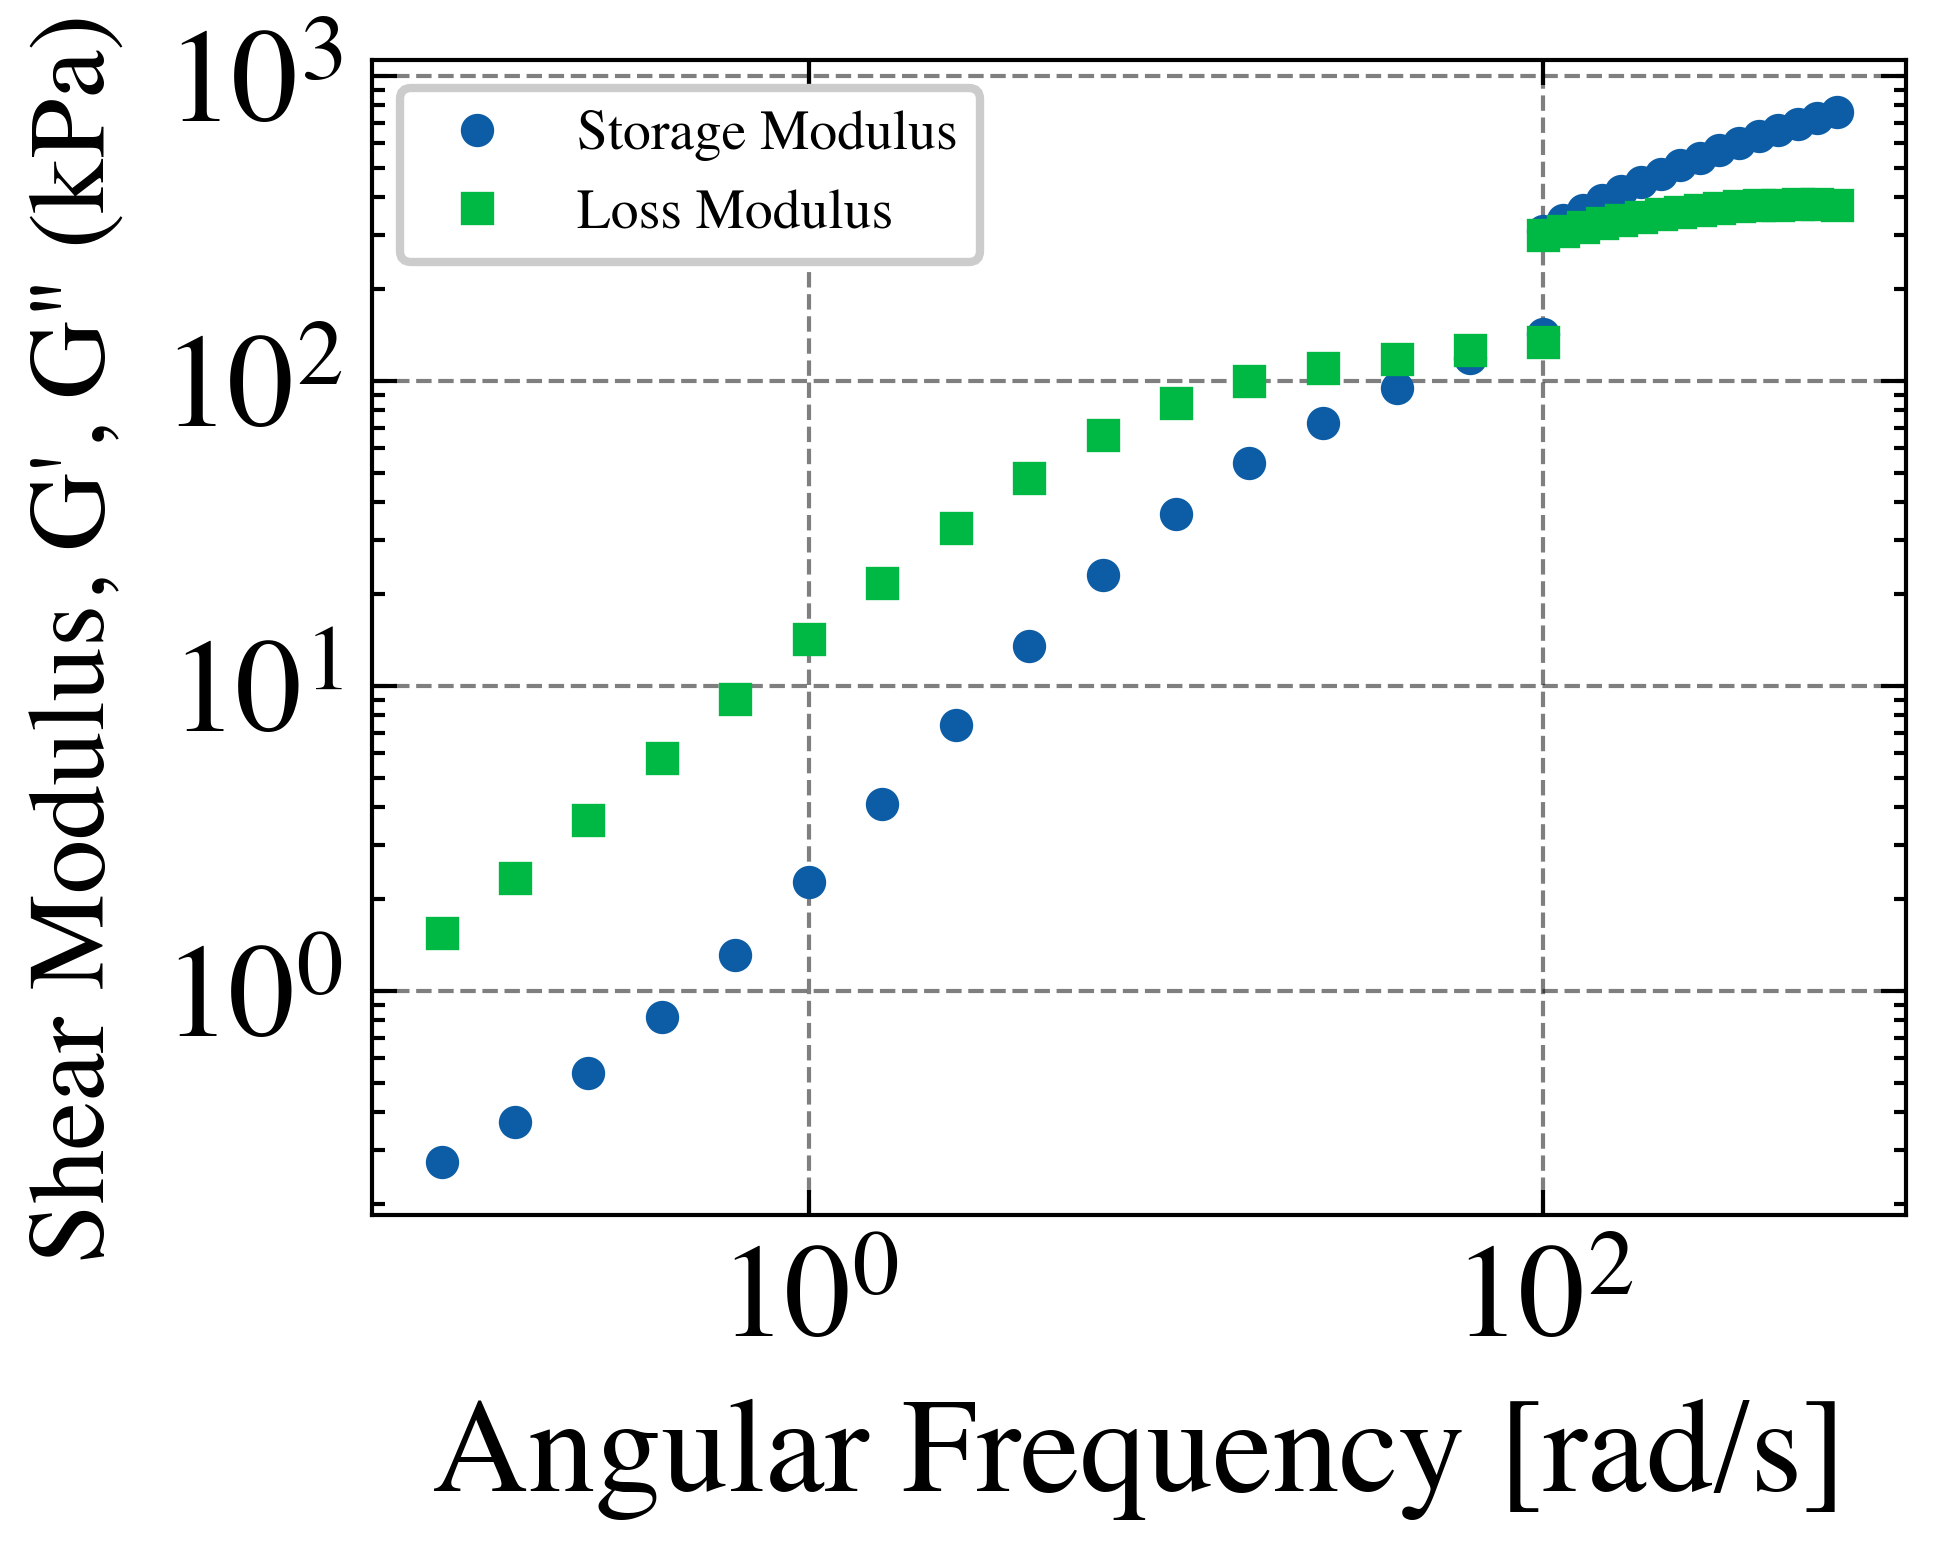

In [476]:
# plt.style.use(['ieee', 'scatter','grid'])
# plt.style.use('notebook')

# Normalize the test name to lowercase to match the dictionary keys
test_name_normalized = "Freq = 0%".lower()

# Access the DataFrame using the normalized test name
specific_test_df = dfs.get(test_name_normalized)

if specific_test_df is not None:
    # Now you can work with specific_test_df
    print(specific_test_df.head())  # Display the first few rows as an example
else:
    print(f"DataFrame for {test_name_normalized} not found.")


import matplotlib.pyplot as plt

# Convert 'Angular Frequency [rad/s]' column to numeric, assuming it's in the correct format
specific_test_df['Angular Frequency [rad/s]'] = pd.to_numeric(specific_test_df['Angular Frequency [rad/s]'], errors='coerce')

# Drop any rows that have NaN values in the columns we're interested in after conversion
specific_test_df.dropna(subset=['Angular Frequency [rad/s]', 'Storage Modulus [Pa]', 'Loss Modulus [Pa]'], inplace=True)
#convert to kpa
specific_test_df['Storage Modulus [Pa]'] = specific_test_df['Storage Modulus [Pa]'] / 1000
specific_test_df['Loss Modulus [Pa]'] = specific_test_df['Loss Modulus [Pa]'] / 1000



# Scatter plot for Storage Modulus
plt.plot(specific_test_df['Angular Frequency [rad/s]'], specific_test_df['Storage Modulus [Pa]'],label='Storage Modulus')

# Scatter plot for Loss Modulus
plt.plot(specific_test_df['Angular Frequency [rad/s]'], specific_test_df['Loss Modulus [Pa]'],label='Loss Modulus')

# Set scale to log for both axes
plt.xscale('log')
plt.yscale('log')

# Adding title and labels
plt.xlabel('Angular Frequency [rad/s]')
plt.ylabel('Shear Modulus, G\', G" (kPa)',fontsize=13)

# Adding legend
plt.legend(fontsize='small')  # Choose an appropriate size like 'small', 'medium', 'large', or a numeric value

# Show plot
plt.show()



# Amplitude test

   Point No. Shear Strain [1] Shear Stress [Pa] Storage Modulus [Pa]  \
0        1.0         0.000002          0.013399              0.37125   
1        2.0         0.000012           0.15165               1474.2   
2        3.0         0.000019           0.25772               1695.7   
3        4.0         0.000028           0.38896               2233.4   
4        5.0         0.000039           0.54233               2233.2   

  Loss Modulus [Pa] Loss Factor [1] Torque [µN·m]  
0            7424.9           20000       0.06175  
1             12097           8.206       0.69888  
2             13626           8.036        1.1877  
3             13518           6.053        1.7925  
4             13784           6.172        2.4993  


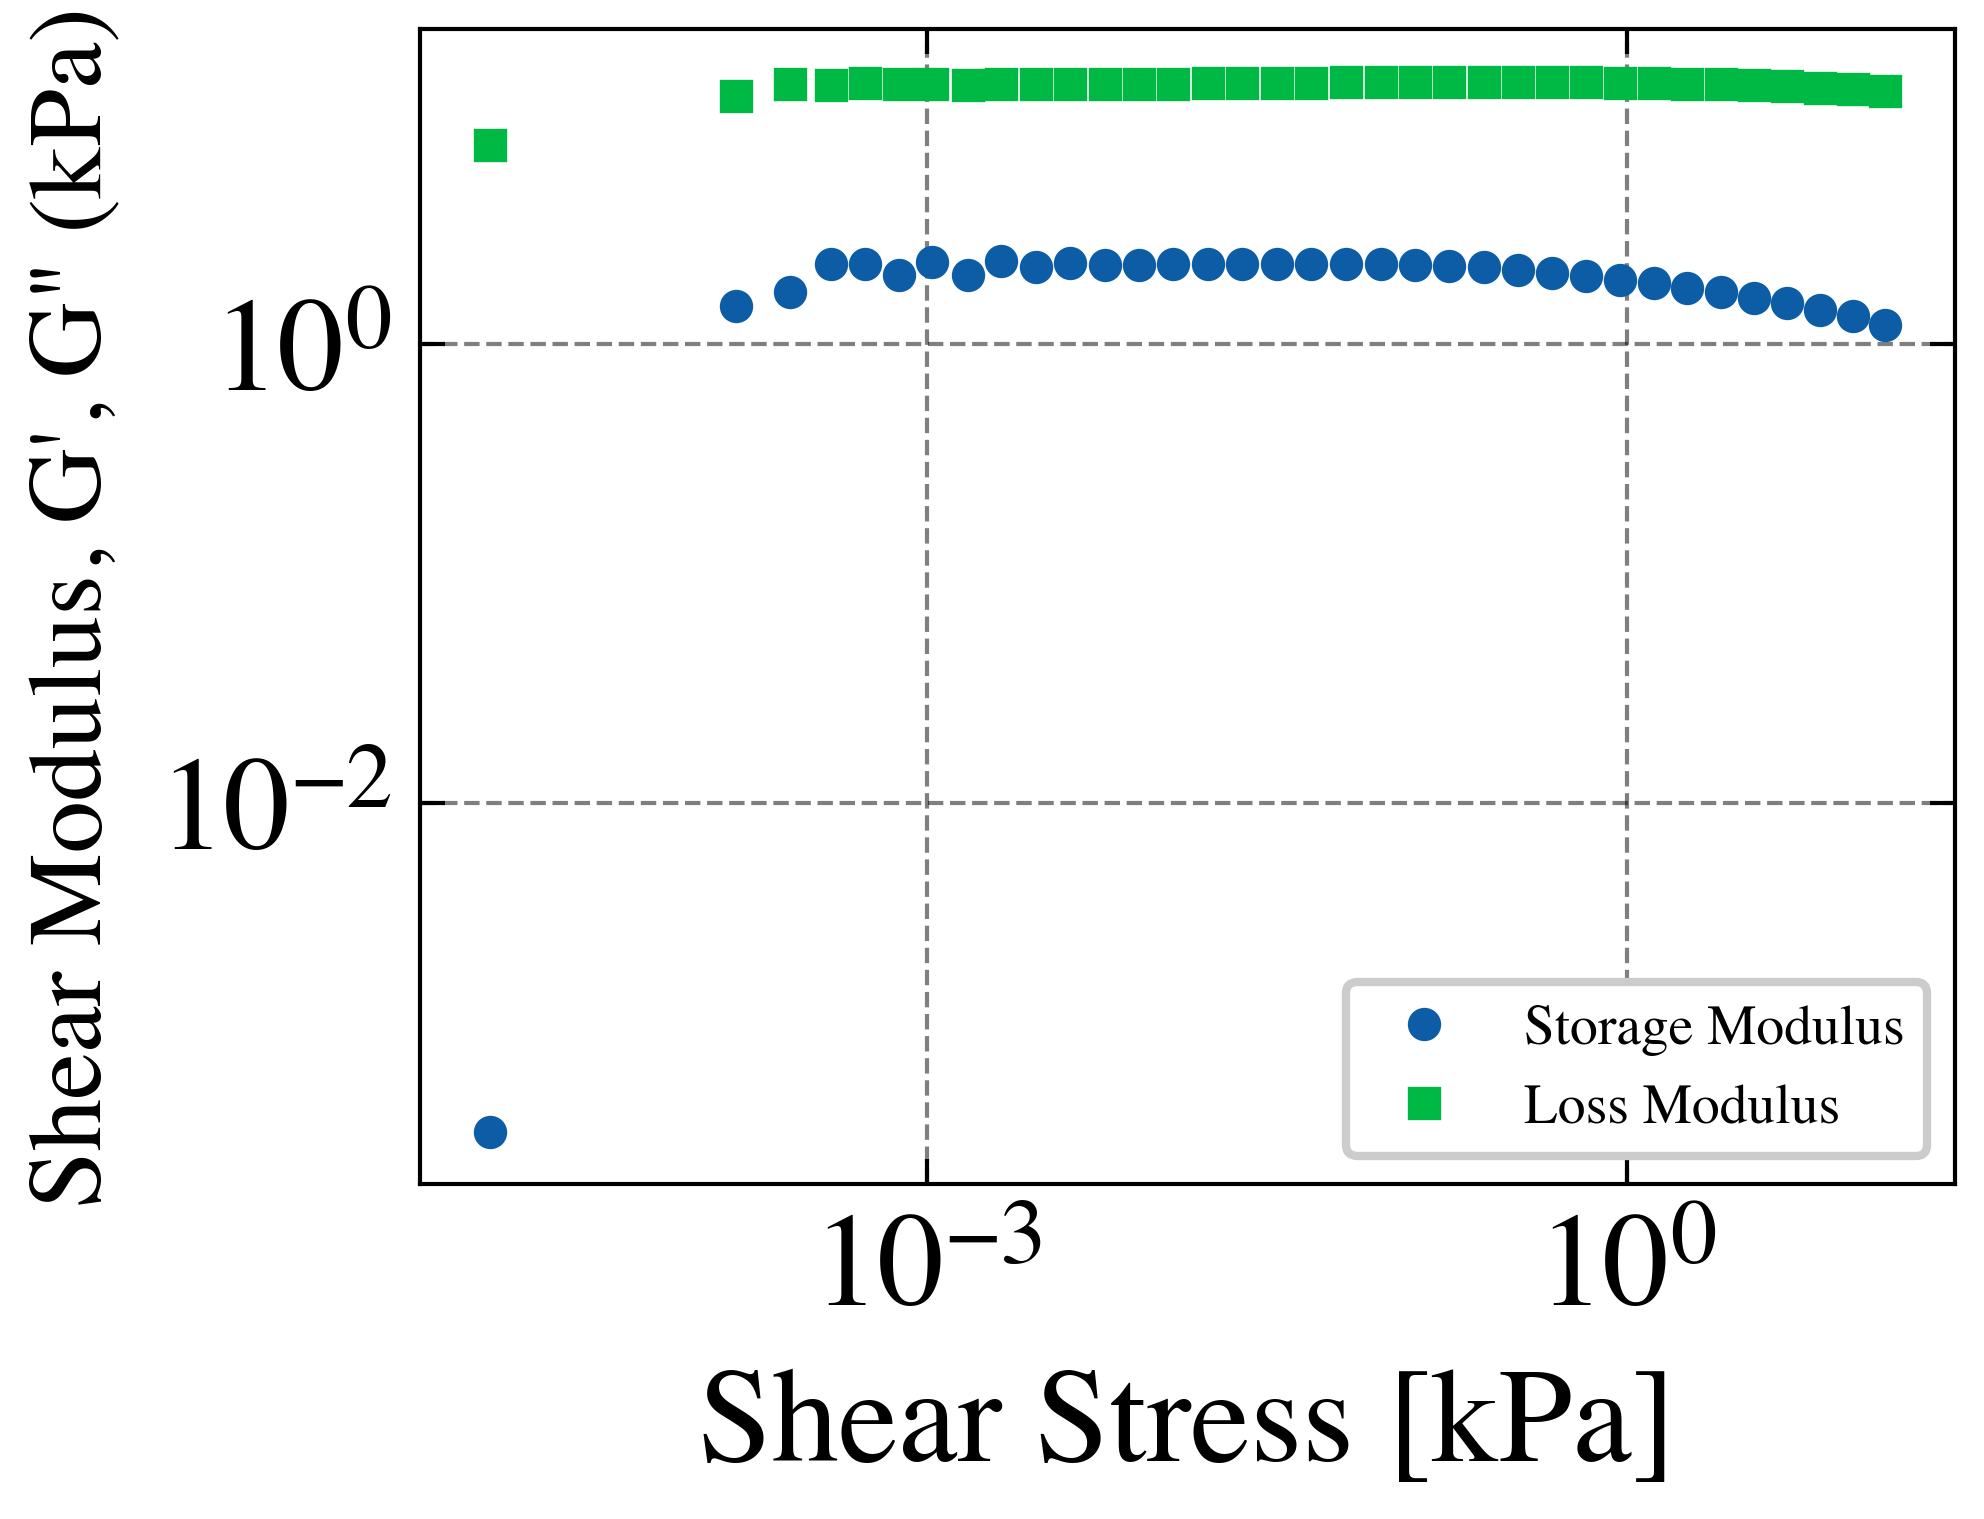

In [477]:
# Normalize the test name to lowercase to match the dictionary keys
test_name_normalized = "Amp = 0%".lower()

# Access the DataFrame using the normalized test name
specific_test_df = dfs.get(test_name_normalized)

if specific_test_df is not None:
    # Now you can work with specific_test_df
    print(specific_test_df.head())  # Display the first few rows as an example
else:
    print(f"DataFrame for {test_name_normalized} not found.")

# Convert 'Shear Stress [Pa]' column to numeric, assuming it's in the correct format
specific_test_df['Shear Stress [Pa]'] = pd.to_numeric(specific_test_df['Shear Stress [Pa]'], errors='coerce')

# Drop any rows that have NaN values in the columns we're interested in after conversion (storage and loss modulus and shear stress)
specific_test_df.dropna(subset=['Shear Stress [Pa]', 'Storage Modulus [Pa]', 'Loss Modulus [Pa]'], inplace=True)
#convert all to kpa
specific_test_df['Shear Stress [Pa]'] = specific_test_df['Shear Stress [Pa]'] / 1000
specific_test_df['Storage Modulus [Pa]'] = specific_test_df['Storage Modulus [Pa]'] / 1000
specific_test_df['Loss Modulus [Pa]'] = specific_test_df['Loss Modulus [Pa]'] / 1000


# Scatter plot for Storage Modulus
plt.plot(specific_test_df['Shear Stress [Pa]'], specific_test_df['Storage Modulus [Pa]'],label='Storage Modulus')

# Scatter plot for Loss Modulus
plt.plot(specific_test_df['Shear Stress [Pa]'], specific_test_df['Loss Modulus [Pa]'],label='Loss Modulus')

# Set scale to log for both axes
plt.xscale('log')
plt.yscale('log')

# Adding title and labels
# plt.title('Shear Moduli vs Shear Stress')
plt.xlabel('Shear Stress [kPa]')
plt.ylabel('Shear Modulus, G\', G" (kPa)',fontsize=12.5)
plt.legend(fontsize='small')  # Choose an appropriate size like 'small', 'medium', 'large', or a numeric value
# Show plot
plt.show()

Stress relaxation test

   Point No. Time [s] Shear Strain [%] Shear Stress [Pa]  \
0        1.0     0.01            0.907            6196.7   
1        2.0    0.021             3.27             13806   
2        3.0    0.031              6.4             17789   
3        4.0    0.042             8.22             16079   
4        5.0    0.054             9.19             12283   

  Relaxation Modulus [Pa] Torque [mN·m]  
0                  682850        28.557  
1                  422290        63.624  
2                  277750         81.98  
3                  195550        74.099  
4                  133640        56.605  


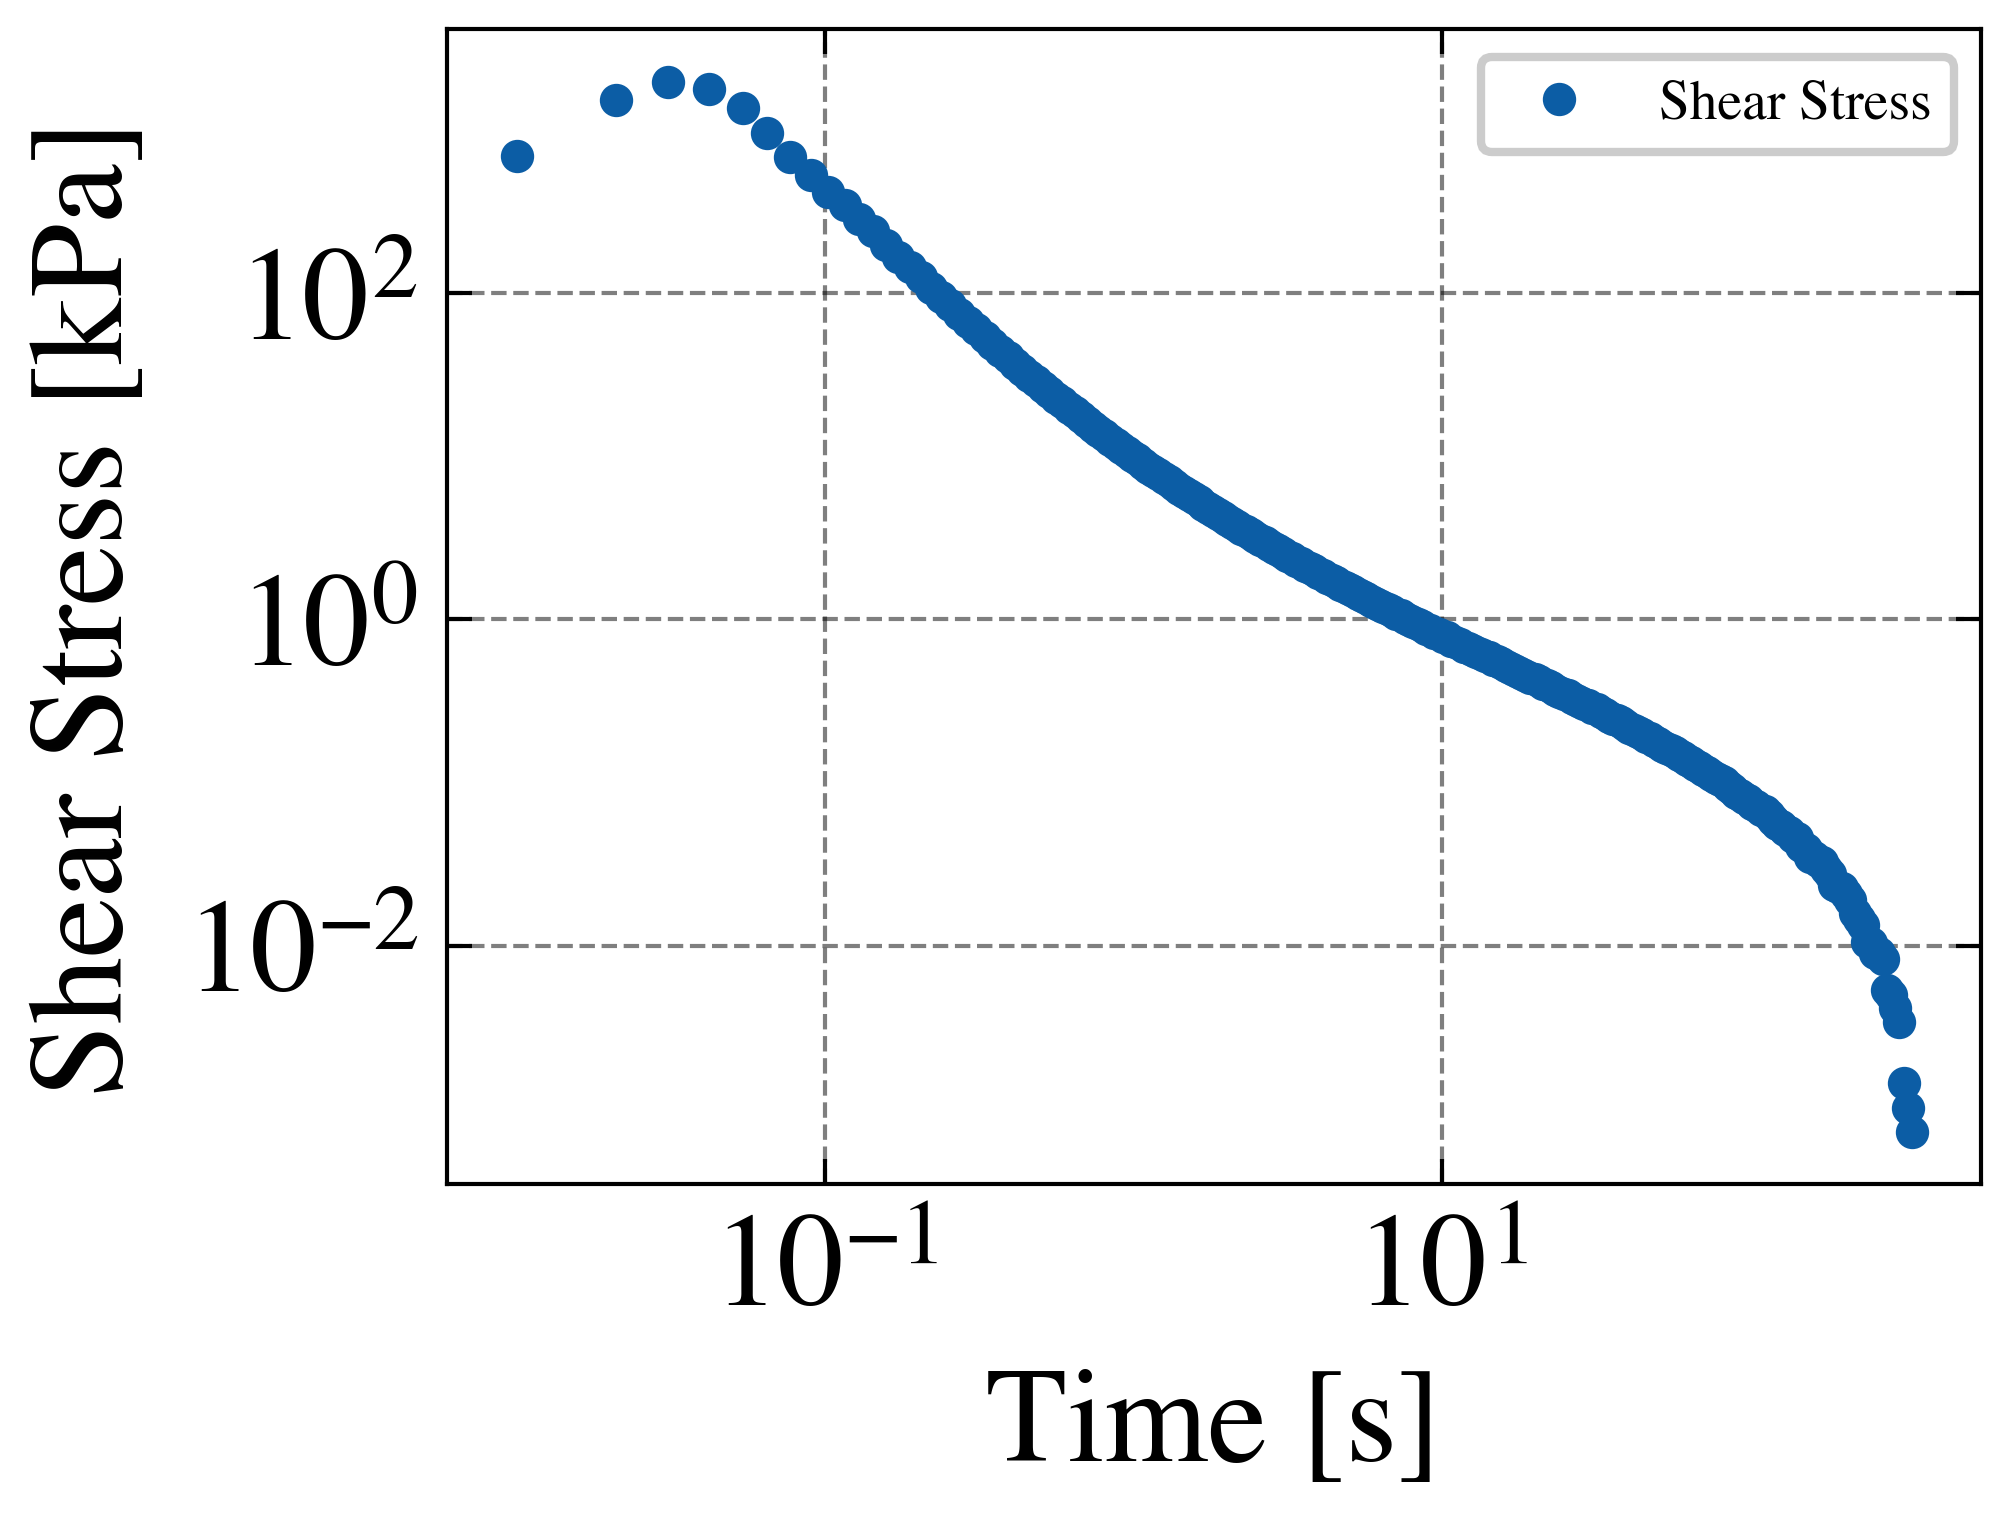

In [478]:
# Normalize the test name to lowercase to match the dictionary keys
test_name_normalized = "Stress relaxation = 0%".lower()

# Access the DataFrame using the normalized test name
specific_test_df = dfs.get(test_name_normalized)

if specific_test_df is not None:
    # Now you can work with specific_test_df
    print(specific_test_df.head())  # Display the first few rows as an example
else:
    print(f"DataFrame for {test_name_normalized} not found.")

# Convert 'Time [s]' column to numeric, assuming it's in the correct format
specific_test_df['Time [s]'] = pd.to_numeric(specific_test_df['Time [s]'], errors='coerce')

# Drop any rows that have NaN values in the columns we're interested in after conversion (shear stress)
specific_test_df.dropna(subset=['Shear Stress [Pa]'], inplace=True)
#convert shear stress to kpa
specific_test_df['Shear Stress [Pa]'] = specific_test_df['Shear Stress [Pa]'] / (10^3)



# Scatter plot for Shear Stress
plt.plot(specific_test_df['Time [s]'], specific_test_df['Shear Stress [Pa]'],label='Shear Stress')

# Set scale to log for both axes
plt.xscale('log')
plt.yscale('log')

# Adding title and labels
# plt.title('Shear Stress vs Time')
plt.xlabel('Time [s]')
plt.ylabel('Shear Stress [kPa]')
plt.legend(fontsize='small')  # Choose an appropriate size like 'small', 'medium', 'large', or a numeric value
# Show plot
plt.show()



# Creep test

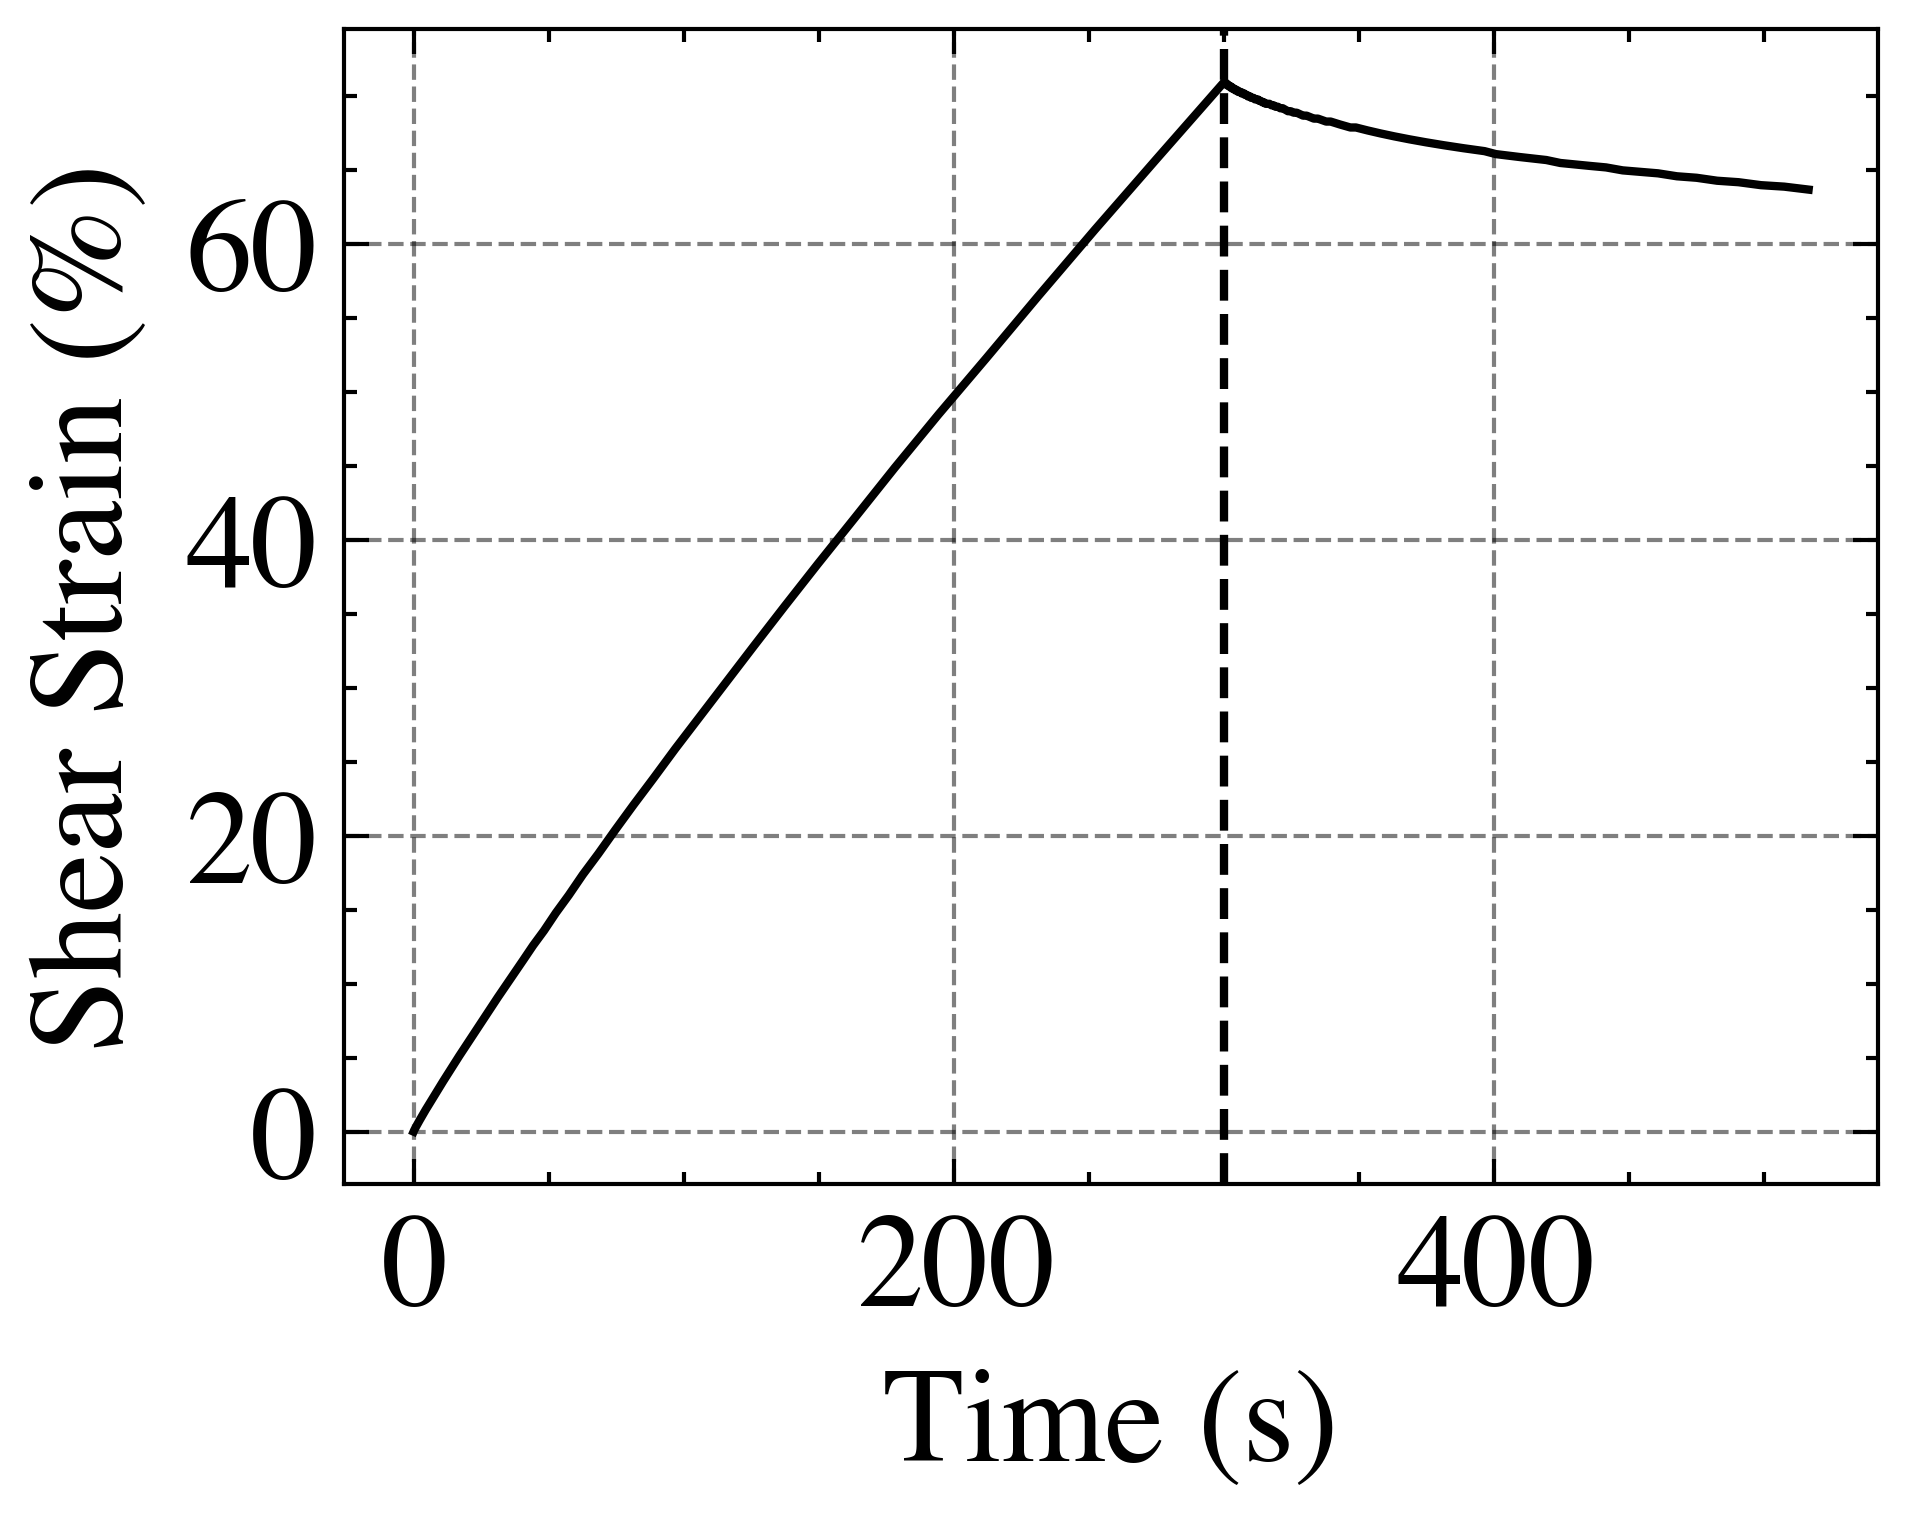

In [479]:
plt.style.use(['ieee', 'grid'])
# Normalize the test name to lowercase to match the dictionary keys
test_name_normalized = "creep + relax = 0%"

# Access the DataFrame using the normalized test name
specific_test_df = dfs[test_name_normalized]

# Convert the 'Time [s]' and 'Shear Strain [%]' columns to numeric, handling non-numeric values
specific_test_df['Time [s]'] = pd.to_numeric(specific_test_df['Time [s]'], errors='coerce')
specific_test_df['Shear Strain [%]'] = pd.to_numeric(specific_test_df['Shear Strain [%]'], errors='coerce')

# Drop rows where 'Time [s]' or 'Shear Strain [%]' is NaN
# specific_test_df.dropna(subset=['Time [s]', 'Shear Strain [%]'], inplace=True)


# Plot the data
plt.plot(specific_test_df['Time [s]'], specific_test_df['Shear Strain [%]'])

# Labeling the axes
plt.xlabel('Time (s)')
plt.ylabel('Shear Strain (%)')

# Adding title and legend
# plt.title('Shear Strain Over Time for Creep and Relaxation Test')
#vertical line at t=300s
plt.axvline(x=300, linestyle='--', linewidth=1, color='k')
#add text that says creep and relaxation at corresponding times, creep should say Shear Stress = 50 Pa, Relaxation should say Shear Stress = 0 Pa
# plt.text(0.2, 0.5, 'Creep', fontsize=12, transform=plt.gcf().transFigure)
# plt.text(0.2, 0.48, 'Shear Stress = 50 Pa', fontsize=12, transform=plt.gcf().transFigure)
# plt.text(0.7, 0.75, 'Relaxation', fontsize=12, transform=plt.gcf().transFigure)
# plt.text(0.7, 0.73, 'Shear Stress = 0 Pa', fontsize=12, transform=plt.gcf().transFigure)

plt.show()


# Temperature sweep test

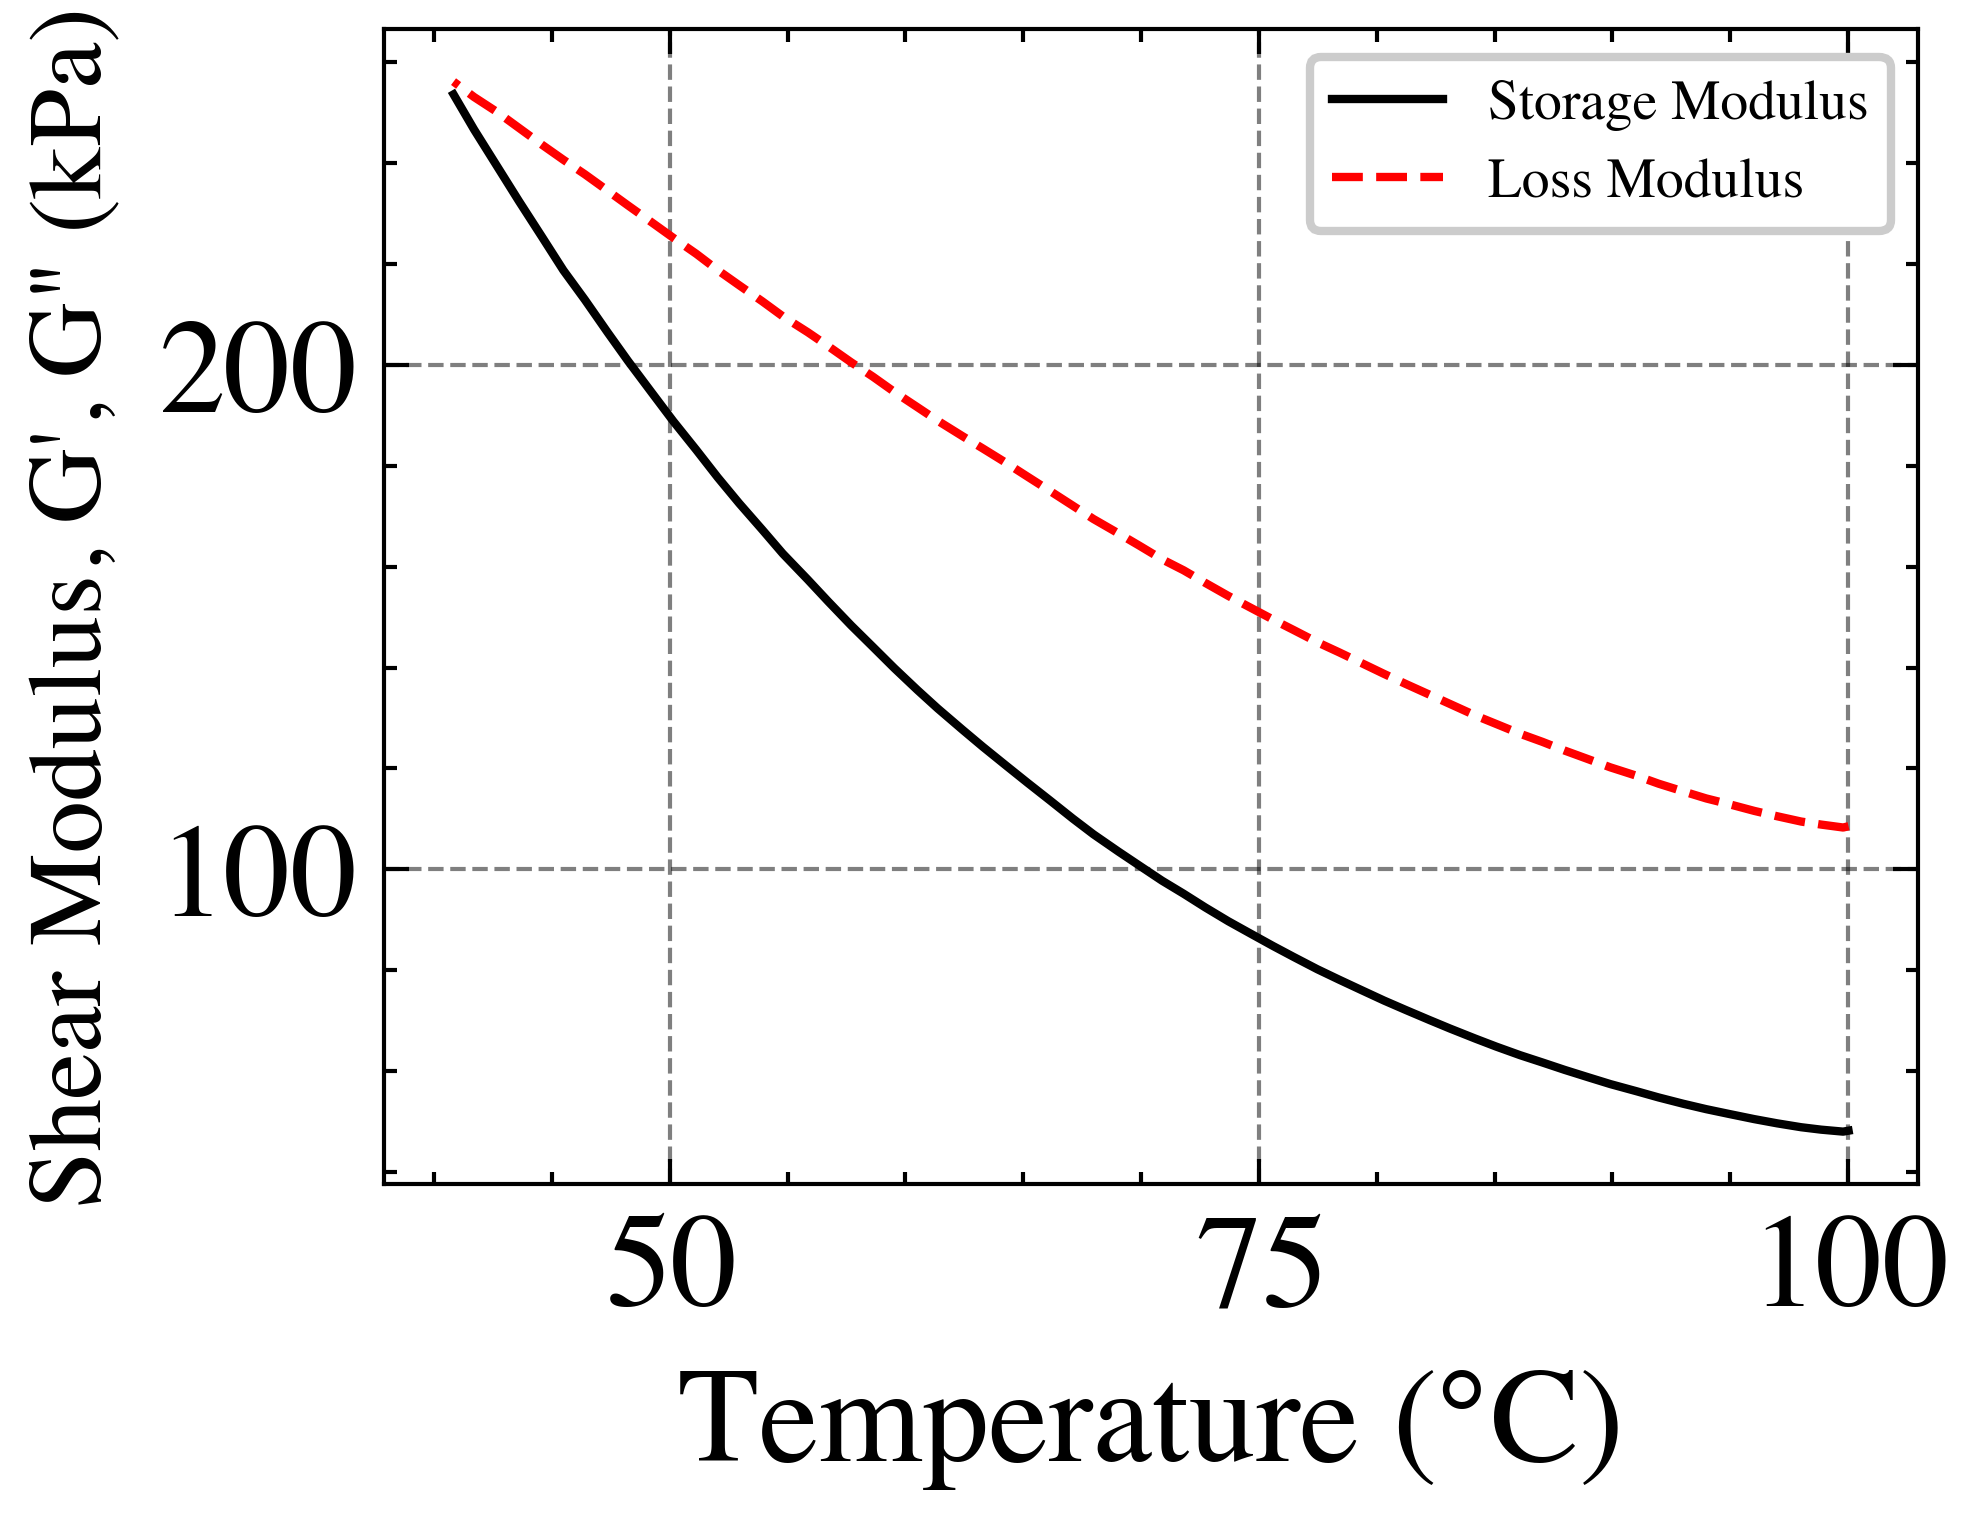

In [480]:
# Normalize the test name to lowercase to match the dictionary keys
test_name_normalized = "temp = 0%"
# Access the DataFrame using the normalized test name
specific_test_df = dfs[test_name_normalized]
# Convert the 'Temperature [°C]' column to numeric, handling non-numeric values
specific_test_df['Temperature [°C]'] = pd.to_numeric(specific_test_df['Temperature [°C]'], errors='coerce')
# Drop rows where 'Temperature [°C]' is NaN
specific_test_df.dropna(subset=['Temperature [°C]'], inplace=True)
#convert to kPa
specific_test_df['Storage Modulus [Pa]'] = specific_test_df['Storage Modulus [Pa]'] / 1000
specific_test_df['Loss Modulus [Pa]'] = specific_test_df['Loss Modulus [Pa]'] / 1000
# Plot the data
plt.plot(specific_test_df['Temperature [°C]'], specific_test_df['Storage Modulus [Pa]'], label='Storage Modulus')
plt.plot(specific_test_df['Temperature [°C]'], specific_test_df['Loss Modulus [Pa]'], label='Loss Modulus')
# Labeling the axes with small font size
plt.xlabel('Temperature (°C)')

plt.ylabel('Shear Modulus, G\', G" (kPa)',fontsize=12.5)
#change label for axes size
# Adding title and legend
# plt.title('Shear Moduli vs Temperature')
plt.legend(fontsize='small')  # Choose an appropriate size like 'small', 'medium', 'large', or a numeric value
plt.show()